# ALBUMENTATIONS LIBRARY

## https://albumentations.ai/

## -> Automatically restructure bounding boxes in images

In [2]:
# Import Depedencies
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import import_ipynb
import Utils
import albumentations as A

In [3]:
# Applying Augmentations
transforms = A.Compose([
    A.Resize(224, 224),
    A.OneOf([A.HorizontalFlip(), A.VerticalFlip()], p=0.3),
    A.RandomRotate90(),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, brightness_by_max=True, p=0.5)
])

In [4]:
# Adding to Pipeline
def augment(image):
    data = {"image":image}
    image = transforms(**data)
    image = image["image"]
    return image

def processData(image, label):
    augImage = tf.numpy_function(func=augment, inp=[image], Tout=tf.float32)
    return augImage, label

In [5]:
# Dataset Batching
BATCH_SIZE=32
BUFFER_SIZE = 8
trainDataset = Utils.trainDataset.map(processData).shuffle(buffer_size=BUFFER_SIZE, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
valDataset = Utils.valDataset.shuffle(buffer_size=BUFFER_SIZE, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
testDataset = Utils.testDataset.shuffle(buffer_size=BUFFER_SIZE, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

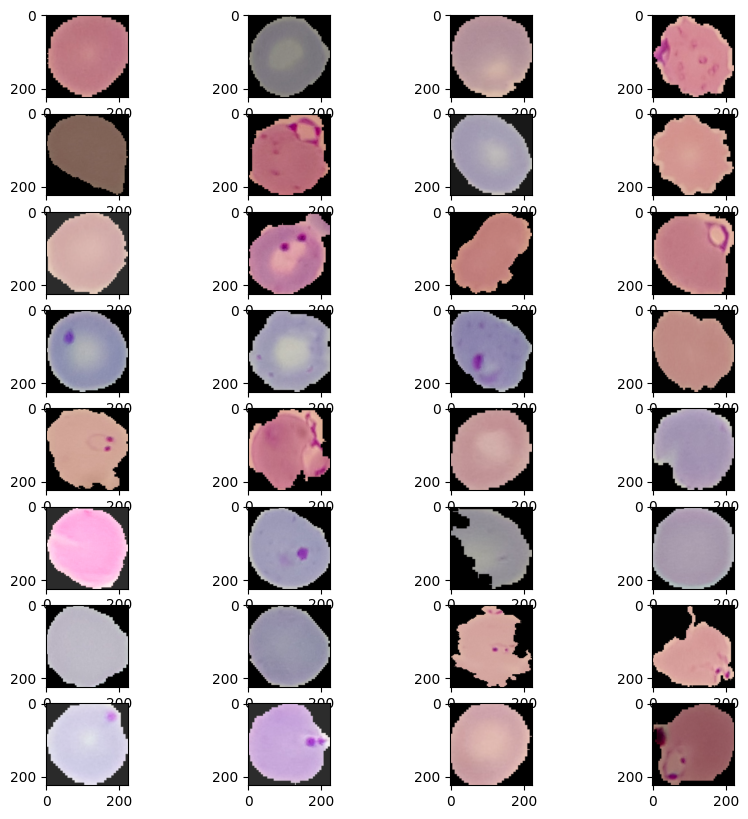

In [6]:
# Visualization
image, label = next(iter(trainDataset))
plt.figure(figsize=(10, 10))
for i in range(1, 33):
    plt.subplot(8, 4, i)
    plt.imshow(image[i-1])

In [ ]:
# Training
Utils.model.fit(trainDataset, validation_data=valDataset, epochs=3, verbose=1)